## Tutorial będący skrótem wykładu 

### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
Pkg.add("DataArrays")
Pkg.add("RDatasets")```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn jest typu DataArrays, który jest  parametryzowany typem przechowywanym w tej kolumnie 
- typ ten może być inny w każdej kolumnie (inaczej niż w dwuwymiarowych tablicach )
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja https://dataframesjl.readthedocs.io/en/latest/introduction.html
- http://juliastats.github.io/DataFrames.jl/


In [4]:
# wsparcie dla nieistniejących wartości - NA
# wartość NA, typ NAtype

using DataArrays 
using DataFrames
dv=@data([7,3,NA,5,42])


5-element DataArrays.DataArray{Int64,1}:
  7  
  3  
   NA
  5  
 42  

In [5]:
# funkcja drop NA czyli dropna()
sum(dropna(dv))

57

In [6]:
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [e,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 2.71828 │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [7]:
typeof(df1[:Col3])

DataArrays.DataArray{Bool,1}

In [8]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[e,pi, sqrt(2), 3, 4,e,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true
7,7,3.141592653589793,true
8,8,1.4142135623730951,false
9,9,3.0,true
10,10,4.0,false


In [9]:
# można odwoływać się po indeksie
show(df2[2])

[2.71828,3.14159,1.41421,3.0,4.0,2.71828,3.14159,1.41421,3.0,4.0]

In [10]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.71828,3.14159,1.41421,3.0,4.0,2.71828,3.14159,1.41421,3.0,4.0]

In [11]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
1,2,3.141592653589793,true
2,3,1.4142135623730951,false


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element DataArrays.DataArray{Float64,1}:
 3.14159
 1.41421

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
1,3.141592653589793,true
2,1.4142135623730951,false


In [15]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true


In [16]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
1,5,4.0,false
2,6,2.718281828459045,true
3,7,3.141592653589793,true
4,8,1.4142135623730951,false
5,9,3.0,true
6,10,4.0,false


In [17]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [18]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

MojaKolumna
Min      1.0
1st Qu.  3.25
Median   5.5
Mean     5.5
3rd Qu.  7.75
Max      10.0
NAs      0
NA%      0.0%

Col2
Min      1.4142135623730951
1st Qu.  2.718281828459045
Median   3.0
Mean     2.8548176088843866
3rd Qu.  3.141592653589793
Max      4.0
NAs      0
NA%      0.0%

Col3
Min      0.0
1st Qu.  0.0
Median   1.0
Mean     0.6
3rd Qu.  1.0
Max      1.0
NAs      0
NA%      0.0%



In [20]:
mean(df2[:MojaKolumna])

5.5

In [22]:
std(df2[:MojaKolumna])

3.0276503540974917

In [24]:
# posortowane wartości w kolumnie Col2 (bez powtórzeń)
sort(unique(df2[:Col2]))

5-element DataArrays.DataArray{Float64,1}:
 1.41421
 2.71828
 3.0    
 3.14159
 4.0    

In [26]:
# zwraca tablice typu Boolean  w zależności od spełnianego warunku
df2[:Col3] .== true

10-element DataArrays.DataArray{Bool,1}:
  true
  true
 false
  true
 false
  true
  true
 false
  true
 false

In [27]:
#Zwraca podzbiór dla wierszy spełniających warunek
df2[df2[:Col3] .== true, :]

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,4,3.0,true
4,6,2.718281828459045,true
5,7,3.141592653589793,true
6,9,3.0,true


In [30]:
# grupowanie wierszy (tutaj po wartosci Col3)
# ostatni argument to funkcja albo wyrażenie 
by(df2, :Col3, x->x)

,Col3,MojaKolumna,Col2,Col3_1
1,false,3,1.4142135623730951,false
2,false,5,4.0,false
3,false,8,1.4142135623730951,false
4,false,10,4.0,false
5,true,1,2.718281828459045,true
6,true,2,3.141592653589793,true
7,true,4,3.0,true
8,true,6,2.718281828459045,true
9,true,7,3.141592653589793,true
10,true,9,3.0,true


In [31]:
# zliczanie ilosci win pogrupowanych po jakości
by(df2, :Col3, x->size(x,1))

,Col3,x1
1,false,4
2,true,6



### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest pakiet Gadfly

```julia
Pkg.add("Gadfly")
```

- koncepcja wzięta z pakietu ggplot2 dla języka R 
- bazuje na książce Leland Wilkinson's "The Grammar of Graphics".
- http://gadflyjl.org/stable/index.html

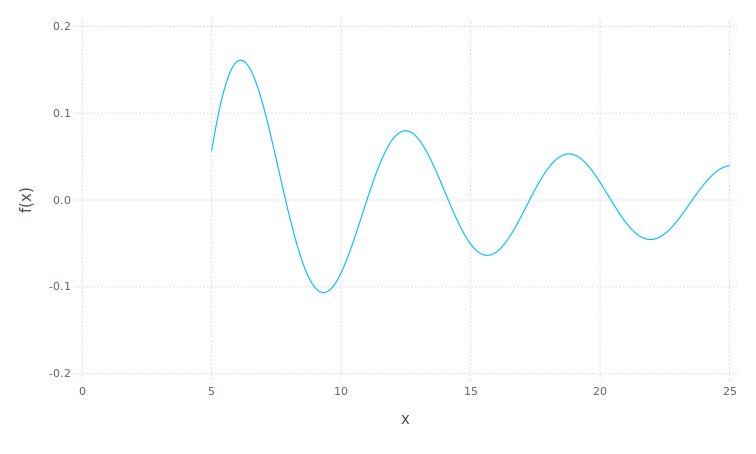

In [114]:
using Gadfly
pl=plot([x-> cos(x)/x], 5, 25)

In [71]:
# zapis do pliku
draw(PNG("gadfly.png", 300, 100), pl)

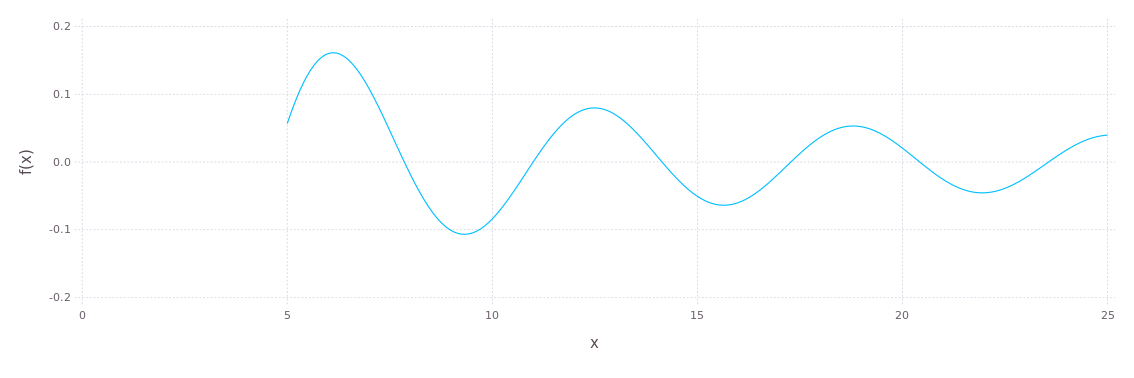

In [115]:
using Images
using FileIO
img = load("gadfly.png")

In [74]:
using Gadfly, DataFrames
df4=readtable("medical.csv")
print("size is ", size(df4))
df4[1:3, 1:size(df4,2)]

size is (50,7)

,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,1,39,106.0,70.0,0,26.97
2,1,2,46,121.0,81.0,0,28.73
3,2,1,48,127.5,80.0,1,25.34


In [75]:
df4[:Płeć]= ifelse(df4[:Płeć].==1, "M", "K")
df4[:Drink]= ifelse(df4[:Drink].==1, "T", "N")
df4[1:3, 1:size(df4,2)]


,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,M,39,106.0,70.0,N,26.97
2,1,K,46,121.0,81.0,N,28.73
3,2,M,48,127.5,80.0,T,25.34


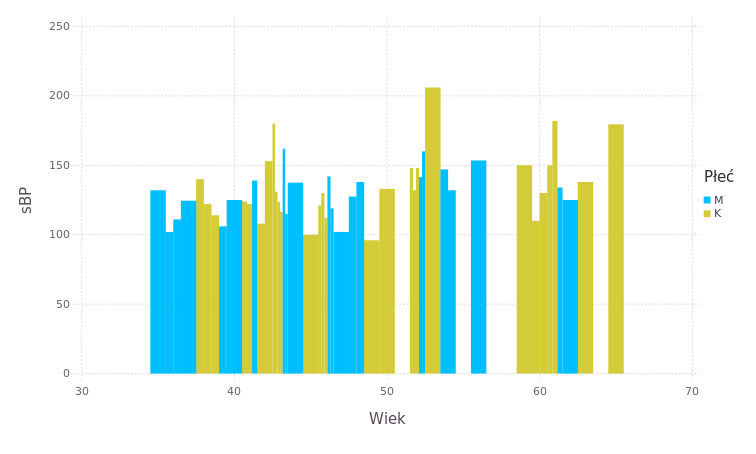

In [117]:
# wykres skórczowego ciśnienia krwi - systolic blood preassure (sBP)
# w zależności od wieku
# z podziałem wg płci
#
set_default_plot_size(20cm, 12cm)
plot(df4, x="Wiek", y="sBP", color="Płeć", Geom.bar(position=:dodge))


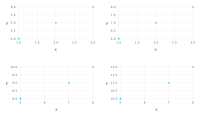

In [123]:
# układanie wykresów w "tabelki" wykresów
using Gadfly
p1 = plot(x=[1,2,3], y=[4,5,6])
p2 = plot(x=[1,2,3], y=[6,7,8])
vstack(p1,p2)

p3 = plot(x=[5,7,8], y=[8,9,10])
p4 = plot(x=[5,7,8], y=[10,11,12])

# to jest to samo
vstack(hstack(p1,p2),hstack(p3,p4))
gridstack([p1 p2; p3 p4])



### Przykład z użyciem równań różniczkowych zwyczajnych

```julia
Pkg.add("DifferentialEquations")
```
http://docs.juliadiffeq.org/stable/

Przykład z równaniem rozpadu promieniotwórczego
http://mathworld.wolfram.com/ExponentialDecay.html

In [10]:
# równanie rozpadu promieniotwórczego

using DifferentialEquations

f = @ode_def Rozpad123 begin
  dx = - λ*x
end λ=>1.5 

u0 = [8.0]

tspan = (0.0,10.0)

prob = ODEProblem(f,u0,tspan)

sol = solve(prob, RK4(), dt=0.01)


DiffEqBase.ODESolution{Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,Rozpad123,DiffEqBase.CallbackSet{Tuple{},Tuple{}}},OrdinaryDiffEq.RK4,OrdinaryDiffEq.InterpolationData{Rozpad123,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4Cache{Array{Float64,1},Array{Float64,1}}}}(Array{Float64,1}[[8.0],[7.8809],[7.76356],[7.64798],[7.53412],[7.42195],[7.31145],[7.2026],[7.09536],[6.98973]  …  [2.75923e-6],[2.71815e-6],[2.67768e-6],[2.63782e-6],[2.59855e-6],[2.55986e-6],[2.52175e-6],[2.4842e-6],[2.44722e-6],[2.44722e-6]],nothing,nothing,[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0,10.0],Array{Array{Float64,1},1}[Array{Float64,1}[[0.0]],Array{Float64,1}[[-12.0],[-11.8213]],Array{Float64,1}[[-11.8213],[-11.6453]],Array{Float64,1}[[-11.6453],[-11.472]],Array{Float64,1}[[-11.472],[-11.3012]],Array{Float64,

In [8]:
fieldnames(sol)

11-element Array{Symbol,1}:
 :u         
 :u_analytic
 :errors    
 :t         
 :k         
 :prob      
 :alg       
 :interp    
 :dense     
 :tslocation
 :retcode   

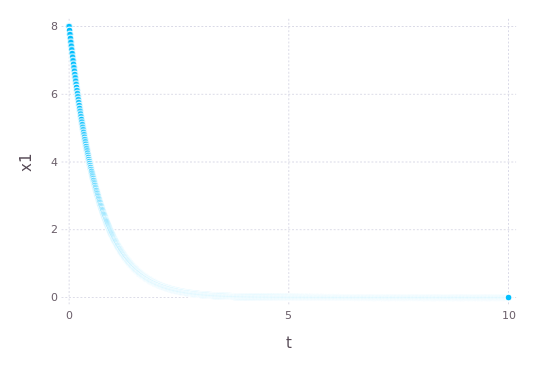

In [11]:
using Gadfly
using DataFrames

df17=DataFrame(t=sol.t, x1=map(x->x[1],sol.u))

plot(df17,  x="t", y="x1")

